In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [36]:
dataset=pd.read_csv('Cellphone.csv')

In [37]:
dataset.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [39]:
dataset.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


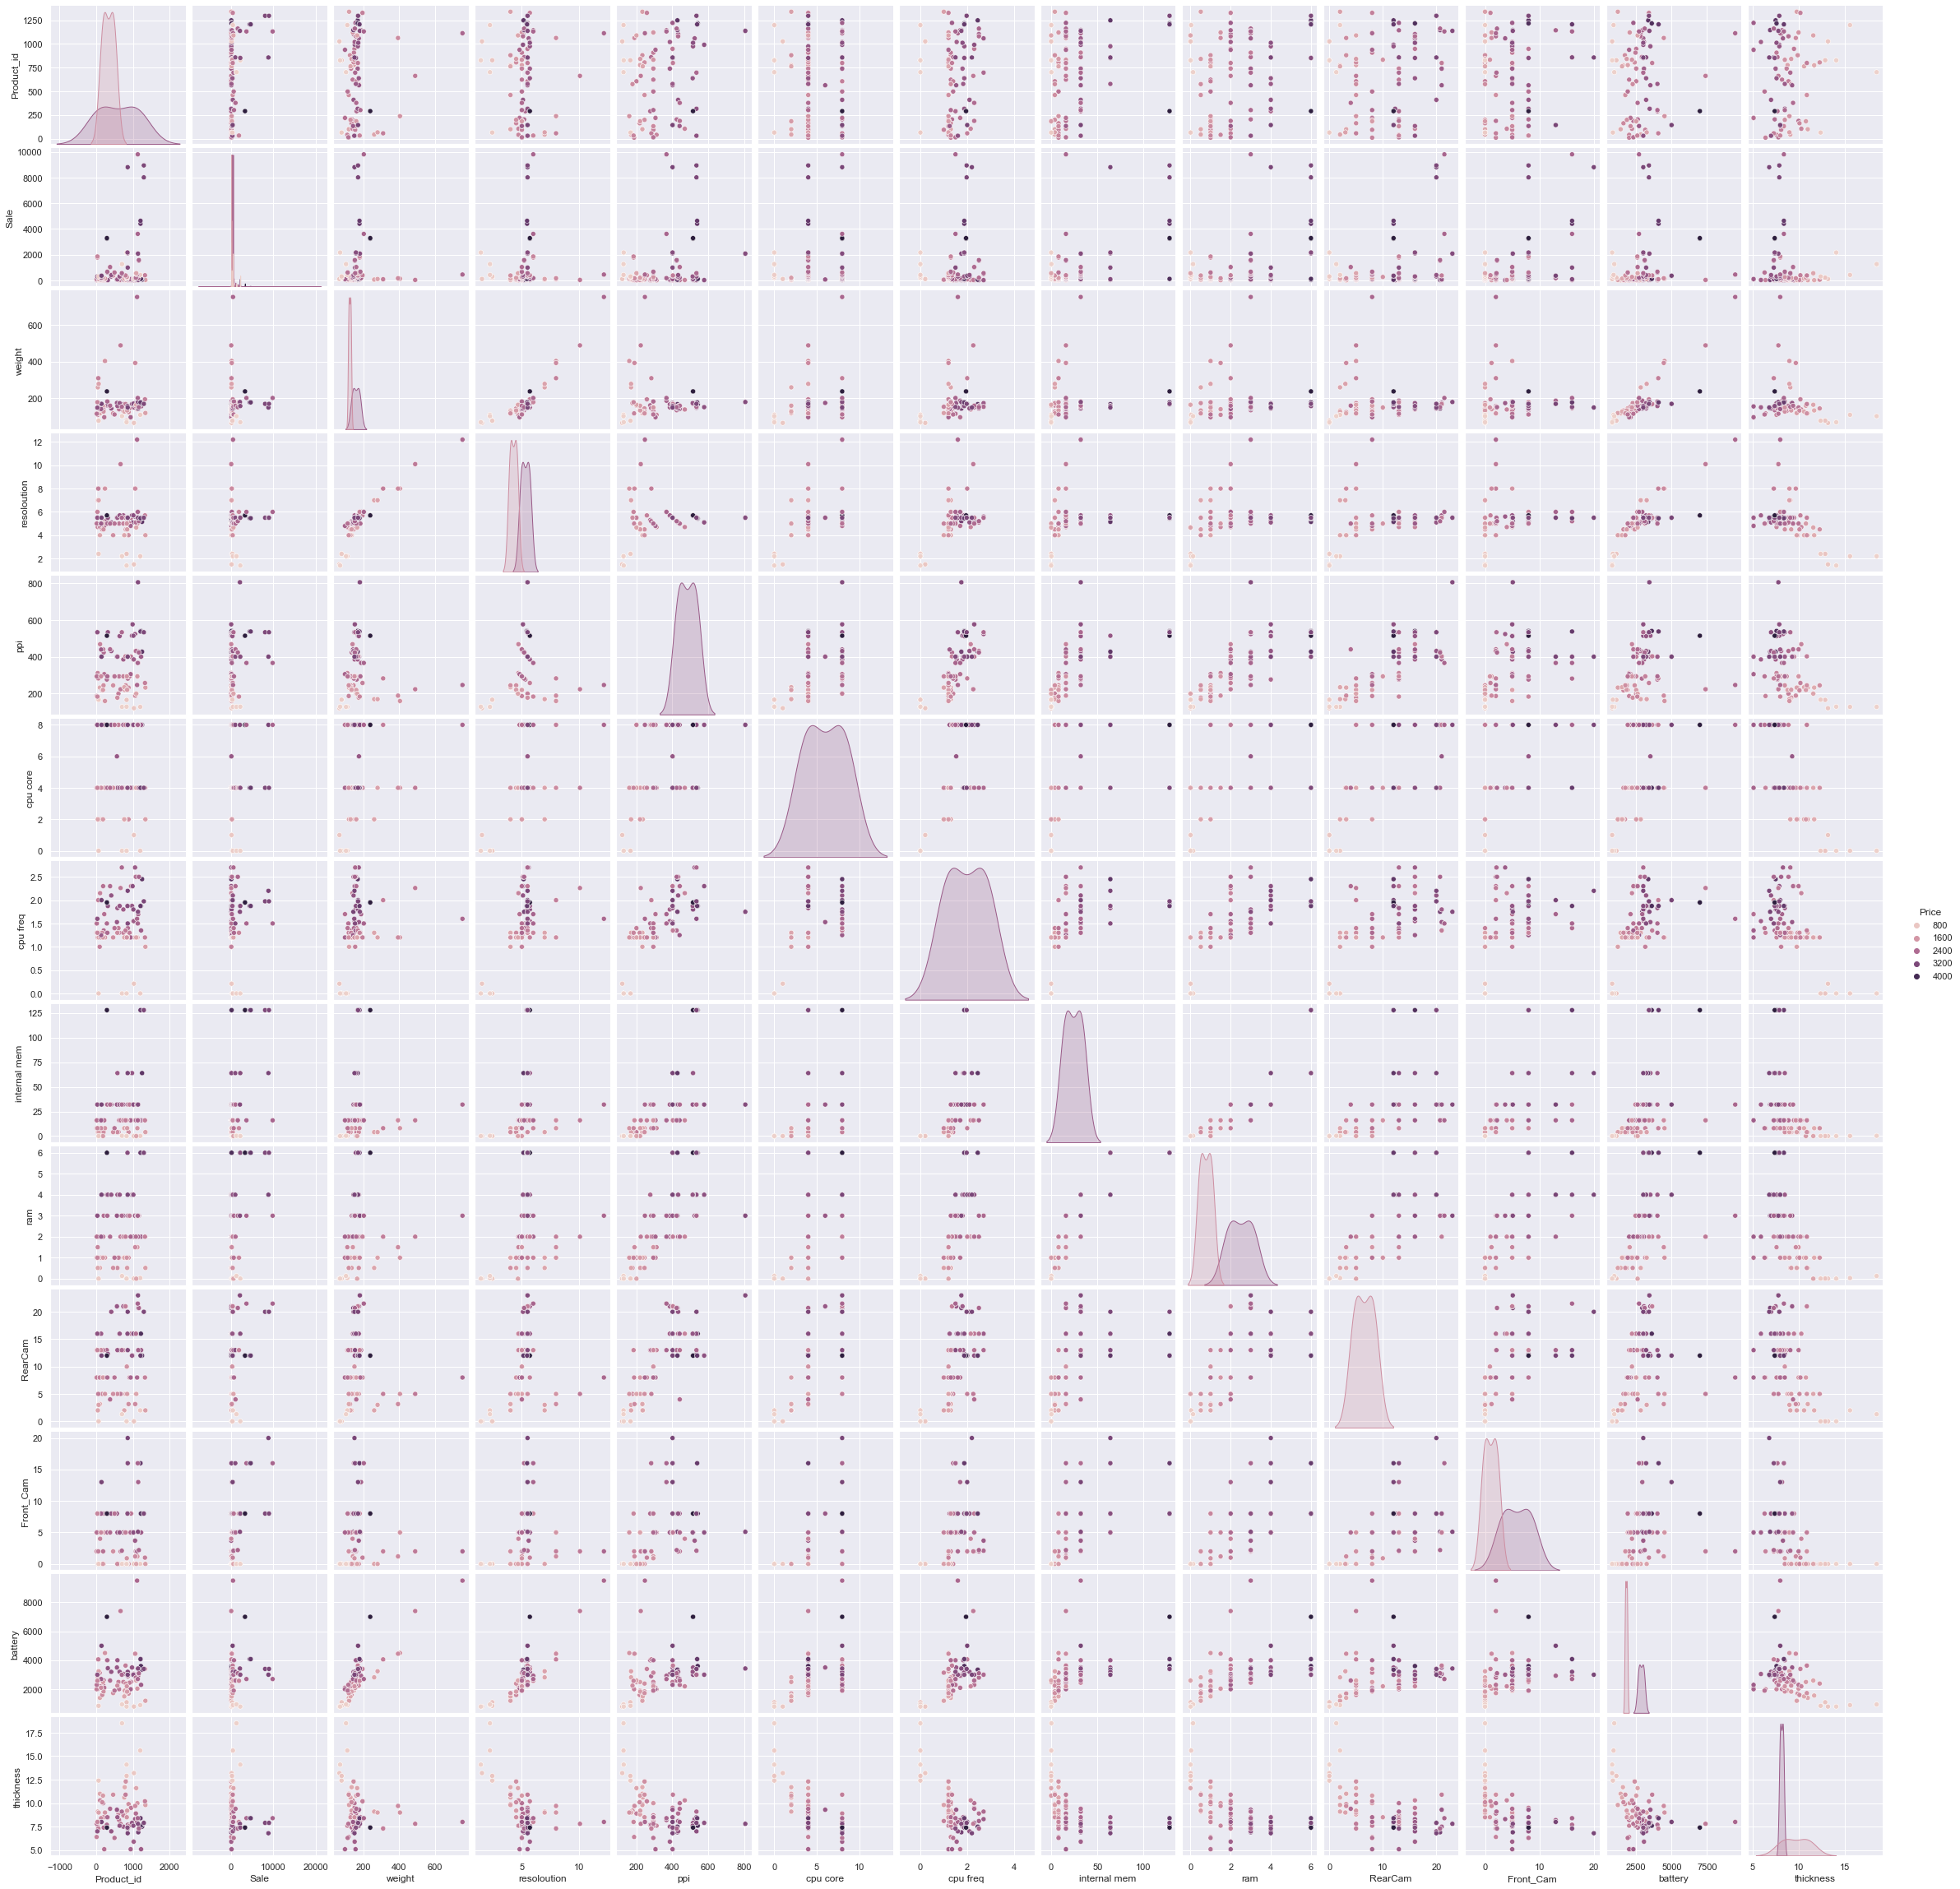

In [40]:
sns.pairplot(dataset,hue='Price')

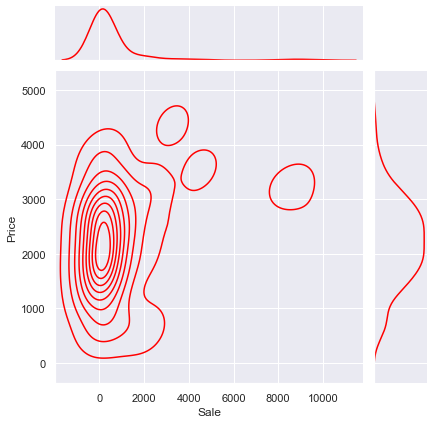

In [41]:
sns.jointplot(x='Sale',y='Price',data=dataset,color='red',kind='kde');

<AxesSubplot:xlabel='Price', ylabel='internal mem'>

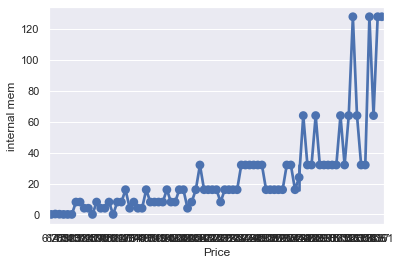

In [42]:
sns.pointplot(y="internal mem", x="Price", data=dataset)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'MegaPixels')

<Figure size 720x432 with 0 Axes>

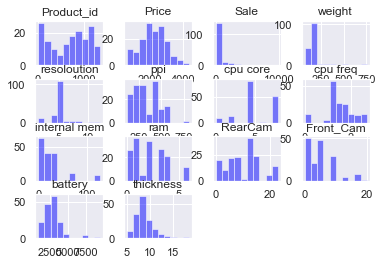

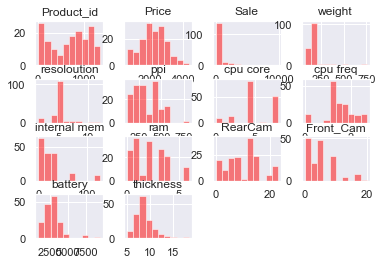

In [43]:
plt.figure(figsize=(10,6))
dataset.hist(alpha=0.5,color='blue',label='RearCam')
dataset.hist(alpha=0.5,color='red',label='Front_Cam')
plt.legend()
plt.xlabel('MegaPixels')

In [44]:
dataset_f = dataset[dataset['Price'] != 0]
dataset_f.shape

(161, 14)

In [45]:
dataset_f = dataset[dataset['Sale'] != 0]
dataset_f.shape

(161, 14)

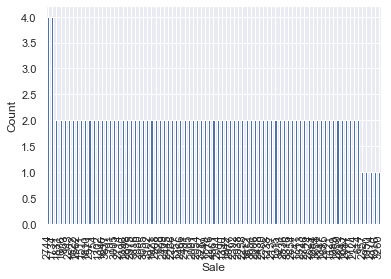

In [46]:
sns.set()
price_plot=dataset_f['Price'].value_counts().plot(kind='bar')
plt.xlabel('Sale')
plt.ylabel('Count')
plt.show()

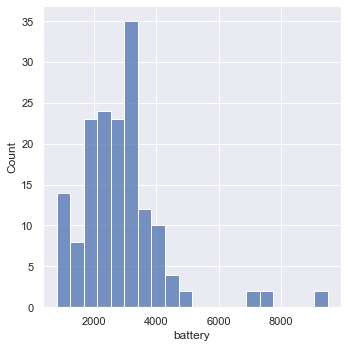

In [47]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=dataset_f ["battery"])
plt.show()

In [48]:
X=dataset_f.drop(['Price'], axis=1)
y=dataset_f['Price']
#missing values
X.isna().any()

Product_id      False
Sale            False
weight          False
resoloution     False
ppi             False
cpu core        False
cpu freq        False
internal mem    False
ram             False
RearCam         False
Front_Cam       False
battery         False
thickness       False
dtype: bool

In [49]:
#train test split of data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)

In [50]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

#Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [52]:
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_valid)

Gaussian NB Classifier Accuracy Score:  0.30303030303030304
              precision    recall  f1-score   support

         754       1.00      1.00      1.00         1
         833       1.00      1.00      1.00         1
        1302       0.00      0.00      0.00         1
        1396       1.00      1.00      1.00         1
        1421       1.00      1.00      1.00         1
        1511       0.00      0.00      0.00         2
        1522       0.00      0.00      0.00         2
        1676       0.00      0.00      0.00         1
        1734       0.00      0.00      0.00         0
        1810       1.00      1.00      1.00         1
        1942       0.00      0.00      0.00         1
        1989       0.00      0.00      0.00         1
        2006       1.00      1.00      1.00         1
        2054       0.00      0.00      0.00         1
        2124       1.00      1.00      1.00         1
        2323       0.00      0.00      0.00         1
        2409       0.

C:\Users\Ajayraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajayraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajayraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajayraj\anaconda3\lib\site-packages\sklearn\metr

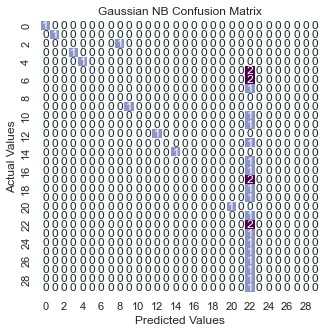

In [53]:
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_valid, y_pred_gnb, 'Gaussian NB Confusion Matrix')

#SVM Classifier(Support Vector Machine)

In [54]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')

In [55]:
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_valid)

SVM Classifier Accuracy Score:  0.0
              precision    recall  f1-score   support

         754       0.00      0.00      0.00       1.0
         833       0.00      0.00      0.00       1.0
        1302       0.00      0.00      0.00       1.0
        1396       0.00      0.00      0.00       1.0
        1421       0.00      0.00      0.00       1.0
        1511       0.00      0.00      0.00       2.0
        1522       0.00      0.00      0.00       2.0
        1646       0.00      0.00      0.00       0.0
        1676       0.00      0.00      0.00       1.0
        1734       0.00      0.00      0.00       0.0
        1810       0.00      0.00      0.00       1.0
        1921       0.00      0.00      0.00       0.0
        1942       0.00      0.00      0.00       1.0
        1989       0.00      0.00      0.00       1.0
        2006       0.00      0.00      0.00       1.0
        2054       0.00      0.00      0.00       1.0
        2124       0.00      0.00      0.00  

C:\Users\Ajayraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajayraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajayraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajayraj\anaconda3\lib\site-packages\sklearn\metr

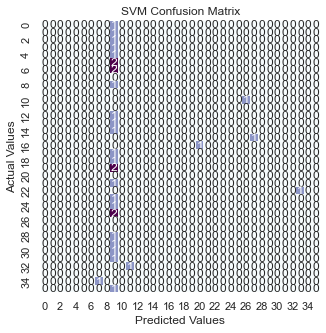

In [56]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')

In [57]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [58]:
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)

Random Forest Classifier Accuracy Score:  0.06060606060606061
              precision    recall  f1-score   support

         754       0.00      0.00      0.00         1
         791       0.00      0.00      0.00         0
         833       0.00      0.00      0.00         1
        1238       0.00      0.00      0.00         0
        1302       0.00      0.00      0.00         1
        1347       0.00      0.00      0.00         0
        1357       0.00      0.00      0.00         0
        1396       0.00      0.00      0.00         1
        1421       0.00      0.00      0.00         1
        1511       0.00      0.00      0.00         2
        1522       0.00      0.00      0.00         2
        1646       0.00      0.00      0.00         0
        1676       0.00      0.00      0.00         1
        1734       0.00      0.00      0.00         0
        1810       0.00      0.00      0.00         1
        1942       0.00      0.00      0.00         1
        1989       

C:\Users\Ajayraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajayraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajayraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajayraj\anaconda3\lib\site-packages\sklearn\metr

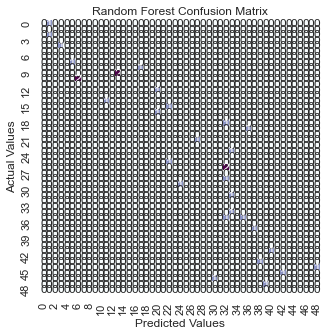

In [59]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')